In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np

import cv2

path = '/content/drive/MyDrive/OpenCV-Images/car.jpg'

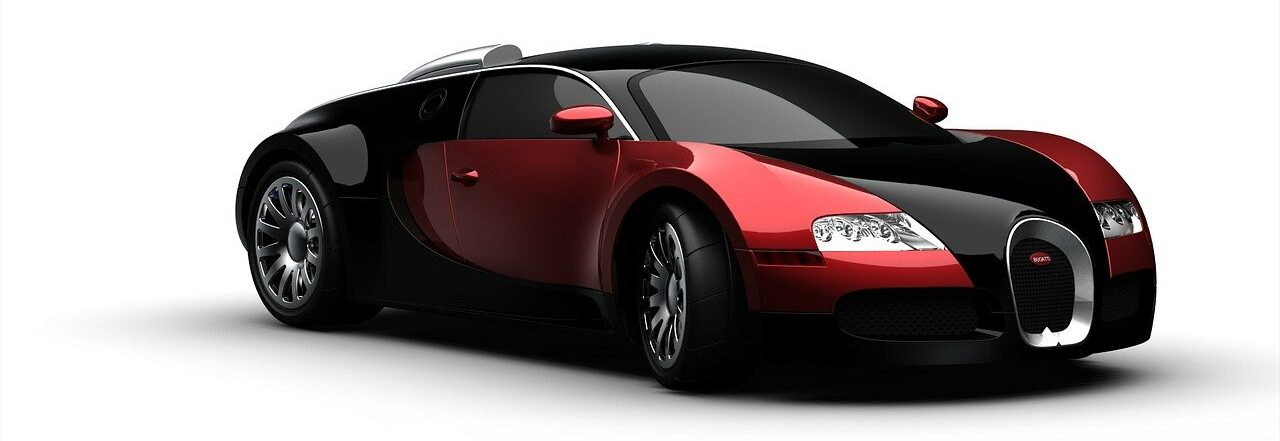

In [ ]:
from google.colab.patches import cv2_imshow

img = cv2.imread(path, cv2.IMREAD_COLOR)
cv2_imshow(img)

#### **When resizing an image:**

- It is important to keep in mind the **original aspect ratio** of the image (i.e. **width by height**), if you want to maintain the same in the resized image too.

- **Reducing** the size of an image will require **resampling of the pixels**. 
Increasing the size of an image requires **reconstruction** of the image. This means you need to **interpolate new pixels**.

- **image.shape** in Python returns three values: **Height, width and number of channels**

In [ ]:
# Get original height and width
h,w,c = img.shape
print("Original Height and Width:", h,"x", w)

Original Height and Width: 441 x 1280


#### **Syntax**

resize(src, dsize[, dst[, fx[, fy[, interpolation]]]])

- **src:** It is the required input image, it could be a string with the path of the input image (eg: ‘test_image.png’).

- **dsize:** It is the desired size of the output image, it can be a new height and width.

- **fx:** Scale factor along the horizontal axis.

- **fy:** Scale factor along the vertical axis.

- **interpolation:** It gives us the option of different methods of resizing the image

#### **1) Resizing by Specifying Width and Height**

In [ ]:
# Set rows and columns
# lets downsize the image using new  width and height
down_width = 300
down_height = 200
down_points = (down_width, down_height)
resize_down = cv2.resize(img, down_points, interpolation= cv2.INTER_LINEAR)

In [ ]:
# Set rows and columns
up_width = 600
up_height = 400
up_points = (up_width, up_height)
# resize the image
resize_up = cv2.resize(img, up_points, interpolation = cv2.INTER_LINEAR)

     Display images
     cv2.imshow('Resized Down by defining height and width', resized_down)
     cv2.waitKey()

     cv2.imshow('Resized Up image by defining height and width', resized_up)
     cv2.waitKey()
     cv2.destroyAllWindows()

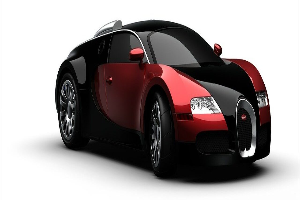

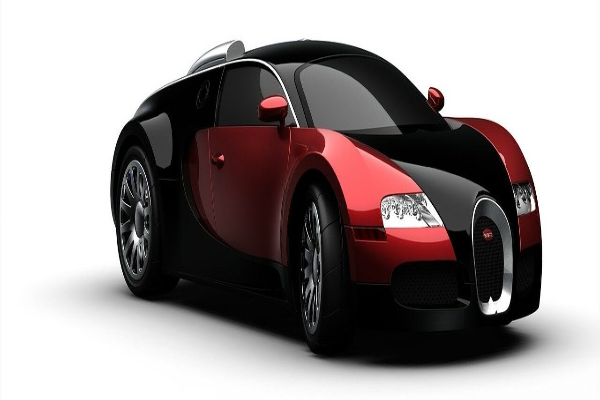

In [ ]:
# Display images
cv2_imshow(resize_down)
cv2.waitKey()
cv2_imshow(resize_up)
cv2.waitKey()
cv2.destroyAllWindows()

#### **2) Resizing With a Scaling Factor**

- **Scale Factor** is usually a number that **scales or multiplies** some quantity, in our case the **width and height** of the image.

- It helps keep the **aspect ratio** intact and **preserves the display quality.** So the image does **not appear distorted**, while you are **upscaling or downscaling** it.

In [ ]:
# Scaling Up the image 1.2 times by specifying both scaling factors
scale_up_x = 1.2
scale_up_y = 1.2

# Scaling Down the image 0.6 times specifying a single scale factor.
scale_down = 0.6
scaled_f_down = cv2.resize(img, None, fx= scale_down, fy= scale_down, interpolation= cv2.INTER_LINEAR)
scaled_f_up = cv2.resize(img, None, fx= scale_up_x, fy= scale_up_y, interpolation= cv2.INTER_LINEAR)

     Display images and press any key to check next image
     cv2.imshow('Resized Down by defining scaling factor', scaled_f_down)
     cv2.waitKey()

     cv2.imshow('Resized Up image by defining scaling factor', scaled_f_up)
     cv2.waitKey()

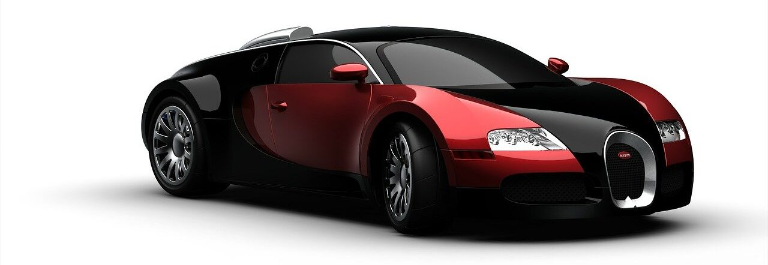

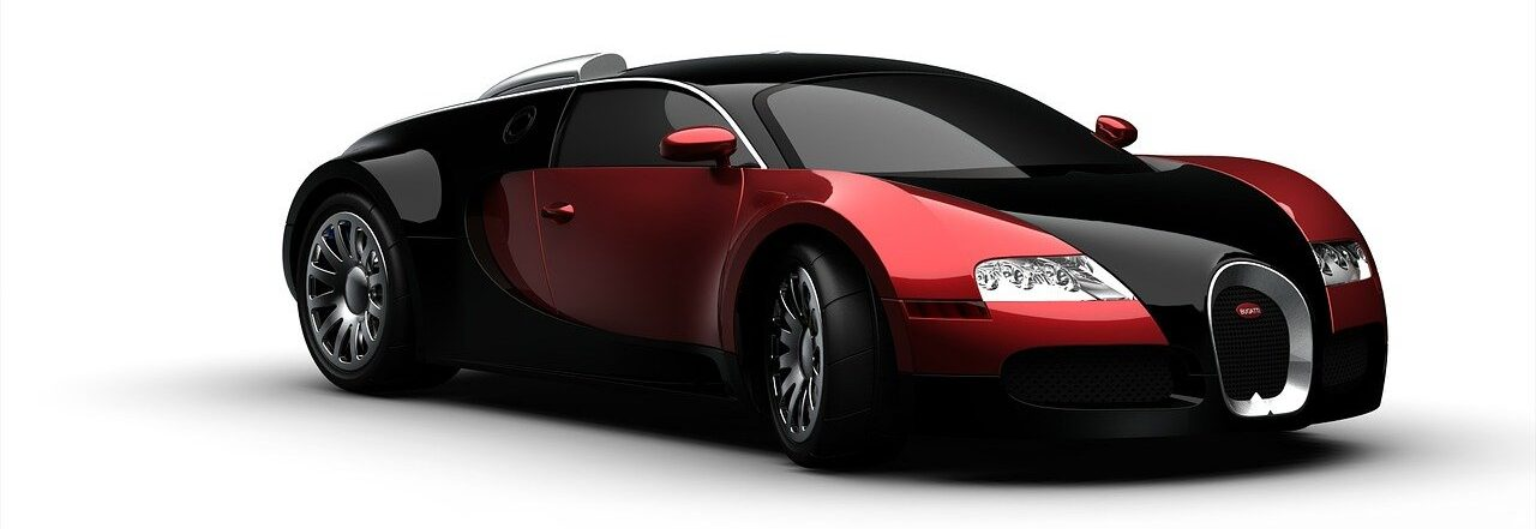

-1

In [ ]:
# Display images and press any key to check next image
cv2_imshow(scaled_f_down)
cv2.waitKey()

cv2_imshow(scaled_f_up)
cv2.waitKey()

#### **3) Resizing With Different Interpolation Methods**

#### **Different interpolation methods are used for different resizing purposes**

- **INTER_AREA:** INTER_AREA uses pixel area relation for resampling. This is best suited for reducing the size of an image (shrinking). When used for zooming into the image, it uses the **INTER_NEAREST** method.

- **INTER_CUBIC:** This uses bicubic interpolation for resizing the image. While resizing and interpolating new pixels, this method acts on the **4×4** neighboring pixels of the image. It then takes the weights average of the **16** pixels to create the new interpolated pixel.

- **INTER_LINEAR:** This method is somewhat **similar** to the **INTER_CUBIC interpolation**. But unlike INTER_CUBIC, this uses **2×2** neighboring pixels to get the weighted average for the interpolated pixel.

- **INTER_NEAREST:** The INTER_NEAREST method uses the nearest neighbor concept for interpolation. This is one of the simplest methods, using only **one** neighboring pixel from the image for interpolation.

In [ ]:
# Scaling Down the image 0.6 times using different Interpolation Method
res_inter_nearest = cv2.resize(img, None, fx= scale_down, fy= scale_down, interpolation= cv2.INTER_NEAREST)

res_inter_linear = cv2.resize(img, None, fx= scale_down, fy= scale_down, interpolation= cv2.INTER_LINEAR)

res_inter_area = cv2.resize(img, None, fx= scale_down, fy= scale_down, interpolation= cv2.INTER_AREA)

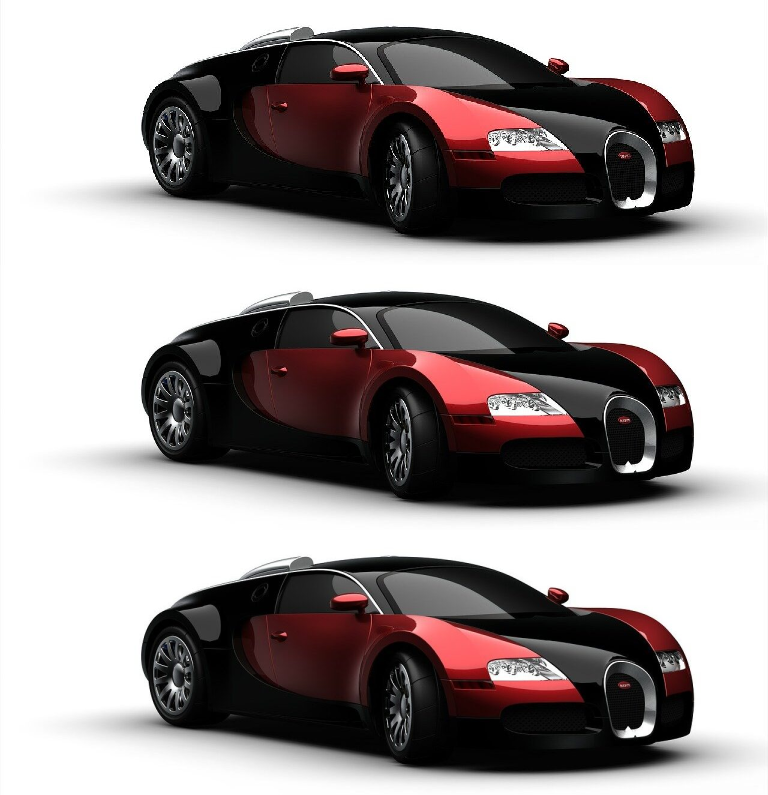

In [ ]:
# Concatenate images in horizontal axis for comparison
vertical = np.concatenate((res_inter_nearest, res_inter_linear, res_inter_area), axis = 0)

# Display the image Press any key to continue
cv2_imshow(vertical)

#### **Reference**

- https://learnopencv.com/image-resizing-with-opencv/